Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1663  
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0025
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011   
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0010   
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.1606e-04
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.0737e-04
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.8354e-04
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1645e-04
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2738e-04
Epoch 13/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.7951e-04
Epoch 14/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7968e-04
Epoch 15/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

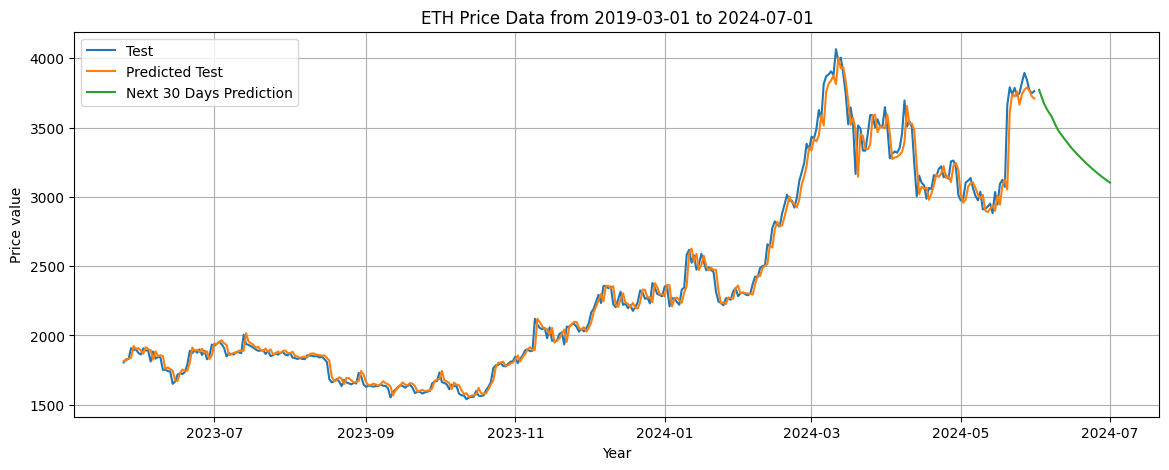

Predicted ETH prices for the next 60 days:
[3772.12227636 3722.65706438 3673.44120409 3638.29466282 3608.59211338
 3583.47147133 3544.54431013 3506.30160532 3474.17306004 3449.94728237
 3426.21264349 3403.66816864 3380.09462776 3357.57704927 3337.03775427
 3318.58741007 3300.15471661 3281.81784143 3263.72219301 3246.3477033
 3229.6963335  3213.772006   3198.1850037  3182.9440119  3168.17230558
 3153.9746685  3140.27937702 3127.038522   3114.18178064 3101.69766598
 3089.60158737 3077.9013896  3066.55700829 3055.53958588 3044.83231215
 3034.428463   3024.32187469 3014.50442228 3004.96069639 2995.67696867
 2986.64511417 2977.85980967 2969.31236986 2960.99410948 2952.89606306
 2945.01094618 2937.3314744  2929.85176414 2922.56509132 2915.46501202
 2908.54396162 2901.79829792 2895.22101665 2888.8076351  2882.55226967
 2876.45043764 2870.49765629 2864.69000322 2859.02299572 2853.49187088]


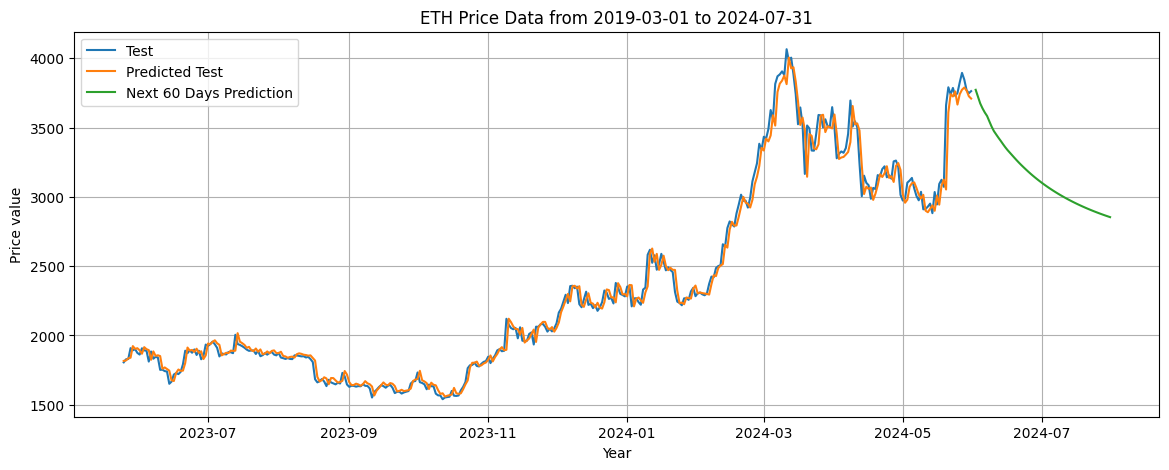

Predicted ETH prices for the next 90 days:
[3772.12227636 3722.65706438 3673.44120409 3638.29466282 3608.59211338
 3583.47147133 3544.54431013 3506.30160532 3474.17306004 3449.94728237
 3426.21264349 3403.66816864 3380.09462776 3357.57704927 3337.03775427
 3318.58741007 3300.15471661 3281.81784143 3263.72219301 3246.3477033
 3229.6963335  3213.772006   3198.1850037  3182.9440119  3168.17230558
 3153.9746685  3140.27937702 3127.038522   3114.18178064 3101.69766598
 3089.60158737 3077.9013896  3066.55700829 3055.53958588 3044.83231215
 3034.428463   3024.32187469 3014.50442228 3004.96069639 2995.67696867
 2986.64511417 2977.85980967 2969.31236986 2960.99410948 2952.89606306
 2945.01094618 2937.3314744  2929.85176414 2922.56509132 2915.46501202
 2908.54396162 2901.79829792 2895.22101665 2888.8076351  2882.55226967
 2876.45043764 2870.49765629 2864.69000322 2859.02299572 2853.49187088
 2848.09242615 2842.82185982 2837.67540899 2832.65083231 2827.7430867
 2822.95021097 2818.2677224  2813.69

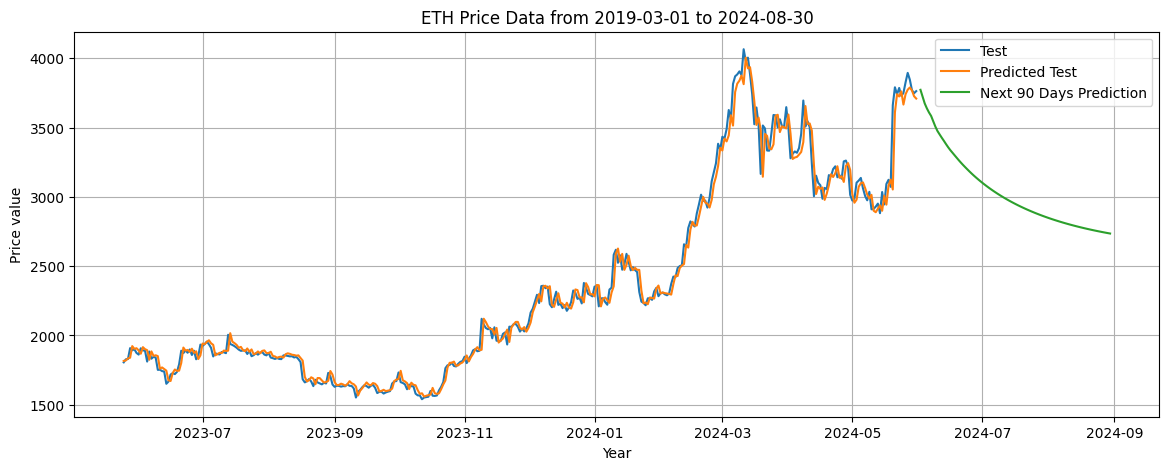

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Load data
df = pd.read_csv(r'/Users/khoanguyen/Downloads/Ethereum_Historical_Data.csv', on_bad_lines='skip', low_memory=False)
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
# Select the Close column as the dependent variable
df_Price = df[['Price']]
df_Price = df_Price.reset_index(drop=True)

# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Price))

# Function to create dataset for time series
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Set time step
time_step = 10

# Split data into train and test sets
train_size = int(0.8 * len(data_scaled))
test_size = len(data_scaled) - train_size
train_data, test_data = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:1]

# Create dataset for training and testing
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features]
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

# Predict the closing prices for the test data
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)

# Evaluate the accuracy of the test data
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSE on Test dataset: {test_mse}")

# The process of creating index to predict the next 30 days
last_index = len(df_Price) - 1

# Create an array of 30 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 30 days
lst_output = []
n_steps = time_step
i = 0
while(i < 30):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_30_days = scaler.inverse_transform(lst_output)

# Print the predicted closing prices for the next 30 days
print('Predicted ETH prices for the next 30 days:')
print(y_next_30_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_30_days, y_next_30_days, label='Next 30 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"ETH Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()

# The process of creating index to predict the next 60 days
last_index = len(df_Price) - 1

# Create an array of 60 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 60 days
lst_output = []
n_steps = time_step
i = 0
while(i < 60):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_60_days = scaler.inverse_transform(lst_output)

# Print the predicted closing prices for the next 60 days
print('Predicted ETH prices for the next 60 days:')
print(y_next_60_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_60_days, y_next_60_days, label='Next 60 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"ETH Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()

# The process of creating index to predict the next 90 days
last_index = len(df_Price) - 1

# Create an array of 90 consecutive integers starting from last_index
x_input = data_scaled[last_index-time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Predict the closing prices for the next 90 days
lst_output = []
n_steps = time_step
i = 0
while(i < 90):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

# Inverse transform the predicted values
y_next_90_days = scaler.inverse_transform(lst_output)

# Print the predicted closing prices for the next 90 days
print('Predicted ETH prices for the next 90 days:')
print(y_next_90_days.flatten())

# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)
# Create a list of indices starting from the next date for 90 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_test)], y_test, label='Test')
plt.plot(df.index[train_size + time_step:train_size + time_step + len(y_pred)], y_pred, label='Predicted Test')
plt.plot(index_next_90_days, y_next_90_days, label='Next 90 Days Prediction')
plt.legend()
plt.grid()
plt.title(f"ETH Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Year")
plt.ylabel("Price value")
plt.show()
